In [1]:
from qsextra import ExcitonicSystem, ChromophoreSystem
from qsextra.qcomo import qevolve, clevolve
from qsextra.tools import spectral_function
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.io import loadmat

In this notebook, we will show an efficient technique to handle environments that are highly non-Markovian.

We do this by adding pseudomodes but keeping the number of qubits involved in the simulation constant.

$$
\hat{H} = \hat{H}^\text{e} + \hat{H}^\text{p} + \hat{H}^\text{ep}
$$

$$
\hat{H}^\text{e} = - \sum_{i=1}^N \frac{\epsilon_i}{2} \hat{\sigma}_i^z + \sum_{i=1}^{N-1} \sum_{j>i} J_{ij} \left( \hat{\sigma}_i^+\hat{\sigma}_j^- + \hat{\sigma}_i^- \hat{\sigma}_j^+ \right)
$$

$$
\hat{H}^\text{p} = \sum_{i=1}^N \sum_{k} \omega_{k} \hat{a}_{ik}^\dagger \hat{a}_{ik}
$$

$$
\hat{H}^\text{ep} = \sum_{i=1}^N | e_i \rangle \langle e_i | \sum_{k} g_{k} \left( \hat{a}_{ik}^\dagger + \hat{a}_{ik} \right)
$$
with $g_{k} = \sqrt{\Gamma_k \Omega_k / 2}$

$$
\frac{d \rho (t)}{dt} =
-i \left[ \hat{H}, \rho (t) \right] +
2 \sum_{i=1}^N
\sum_k \Omega_k
\left(
\hat{a}_{ik} \rho (t) \hat{a}_{ik}^\dagger -
\frac{1}{2} \left[ \hat{a}_{ik}^\dagger \hat{a}_{ik}, \rho (t) \right]_+
\right)
$$

In [2]:
epsilon = [0.]*2
J = toeplitz([0., 1.])
dt_collisions = 0.05
t_list = np.arange(0, 20, dt_collisions)

In [3]:
esys = ExcitonicSystem(energies=epsilon, dipole_moments=[1.,1.], couplings=J)
esys.set_state(state_type='localized excitation', state=0)
sys = ChromophoreSystem(excitonic_system=esys)

Case 1: One pseudomode with $\Gamma = 20$ and $d = 16$

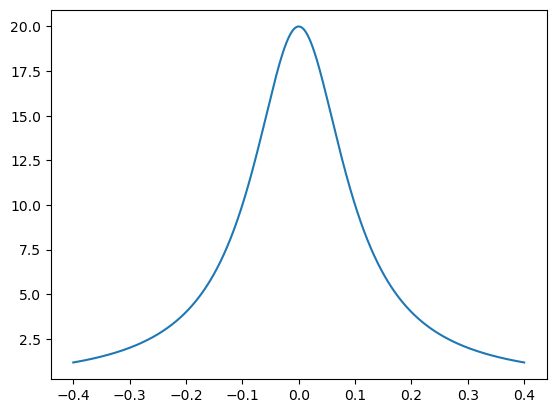

In [4]:
frequencies_pseudomode = [0]
Gamma = [20]
Omega = [0.1]
fr, sf = spectral_function(frequencies_pseudomode, Gamma, Omega)
plt.plot(fr, sf)

In [5]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [16]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma)*np.array(Omega)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega)).tolist()
results = clevolve(sys, t_list, coll_rate, measure_populations = True)

A wise man can learn more from a foolish question than a fool can learn from a wise answer. [Master Shifu]


[[<matplotlib.lines.Line2D at 0x20e269d1810>],

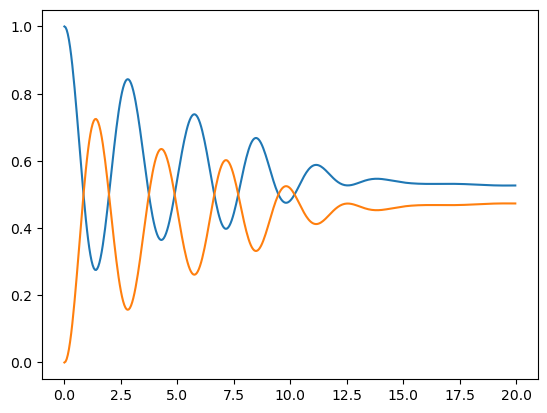

In [6]:
P_qutip_1 = results.expect
[plt.plot(t_list, P_qutip_1[i]) for i in range(len(epsilon))]

Case 2: Two pseudomodes with $\Gamma = 10$ and $d = 4$

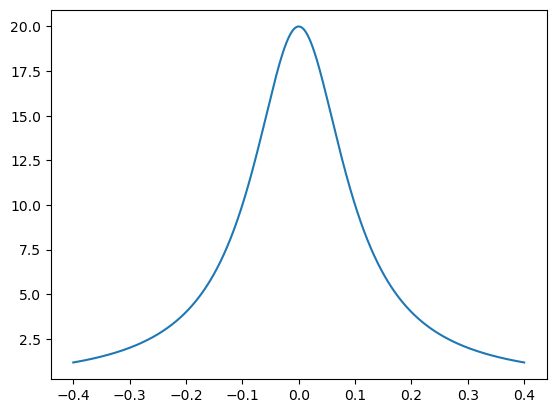

In [7]:
frequencies_pseudomode = [0, 0]
Gamma = [10, 10]
Omega = [0.1, 0.1]
fr, sf = spectral_function(frequencies_pseudomode, Gamma, Omega)
plt.plot(fr, sf)

In [8]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [4]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma)*np.array(Omega)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega)).tolist()
results = clevolve(sys, t_list, coll_rate, measure_populations = True)

There are no coincidences in this world. [Master Oogway]


[[<matplotlib.lines.Line2D at 0x20e28049810>],

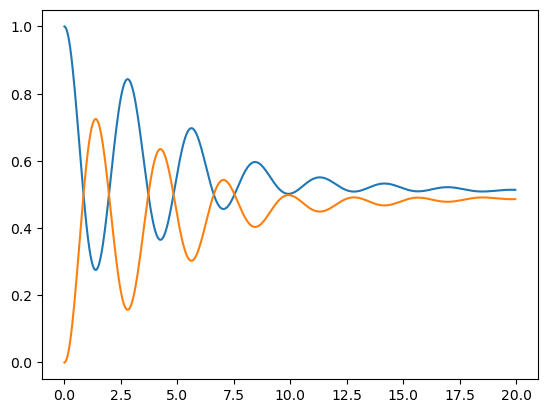

In [9]:
P_qutip_2 = results.expect
[plt.plot(t_list, P_qutip_2[i]) for i in range(len(epsilon))]

Case 3: Four pseudomodes with $\Gamma = 5$ and $d = 2$

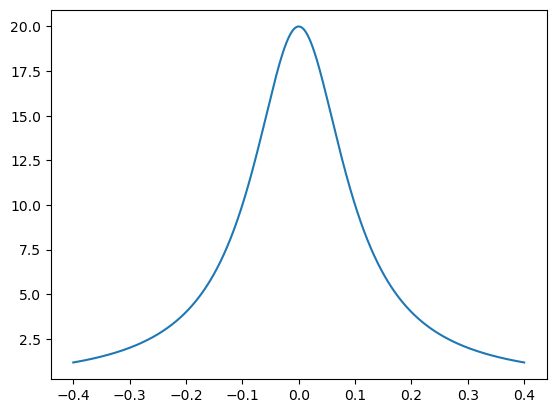

In [10]:
frequencies_pseudomode = [0, 0, 0, 0]
Gamma = [5, 5, 5, 5]
Omega = [0.1, 0.1, 0.1, 0.1]
fr, sf = spectral_function(frequencies_pseudomode, Gamma, Omega)
plt.plot(fr, sf)

In [11]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [2]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma)*np.array(Omega)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega)).tolist()
results = clevolve(sys, t_list, coll_rate, measure_populations = True)

There is no charge for awesome. [Po]


[[<matplotlib.lines.Line2D at 0x20e27c49810>],

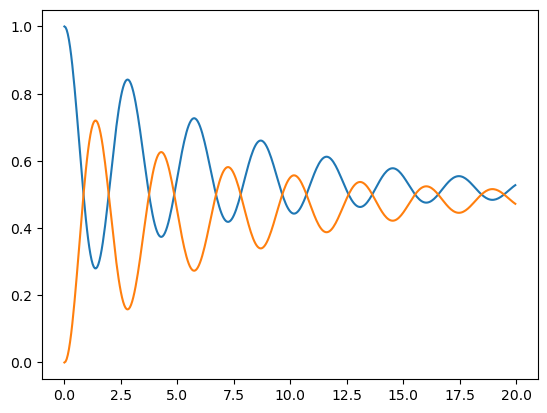

In [12]:
P_qutip_4 = results.expect
[plt.plot(t_list, P_qutip_4[i]) for i in range(len(epsilon))]

Comparison

In [13]:
heom = loadmat('data.mat')

Text(0, 0.5, '$\\rho_{11}$')

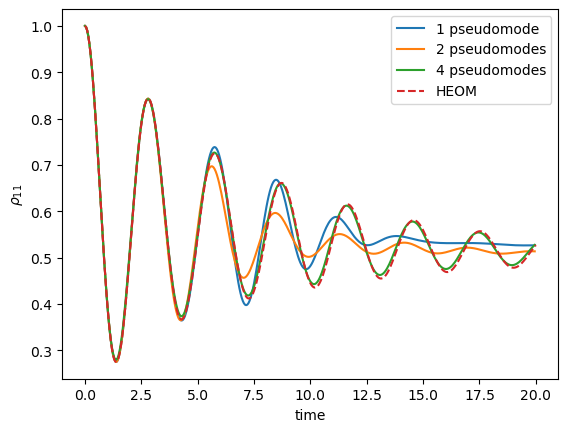

In [14]:
plt.plot(t_list, P_qutip_1[0], label='1 pseudomode') #16 -> 4 qubits
plt.plot(t_list, P_qutip_2[0], label='2 pseudomodes') #4, 4 -> 4 qubits
plt.plot(t_list, P_qutip_4[0], label='4 pseudomodes') #2, 2, 2, 2 -> 4 qubits
plt.plot(heom['x'][0], heom['y'][0], '--', label='HEOM')
plt.legend()
plt.xlabel('time');
plt.ylabel(r'$\rho_{11}$')
# plt.savefig('More is Better.png', dpi=600)